In [1]:
import networkx as nx
import matplotlib.pyplot as plt
INF = 99999999

In [2]:
class MaximumFlow:
    def __init__(self, nodes_num):
        self.nodes_num = nodes_num
        self.edges = [[0 for x in range(nodes_num + 1)] for y in range(nodes_num + 1)] 
        self.parent = {}

        self.original_edges = [[0 for x in range(nodes_num + 1)] for y in range(nodes_num + 1)] 

    def add_edge(self, from_node, to_node, cap):
        self.edges[from_node][to_node] += cap
        self.original_edges[from_node][to_node] += cap

    # Bfs is used to find augmenting paths. Update the hashmap "parent" 
    # while bfs to find the path.
    def bfs(self, source, target):
        visited = [False for x in range(0, self.nodes_num + 1)]
        visited[source] = True
        queue = []
        queue.append(source)
        while len(queue) > 0:
            i = queue[0]
            queue.pop(0)
            for j in range(1, self.nodes_num + 1):
                if self.edges[i][j] > 0 and visited[j] == False:
                    visited[j] = True
                    self.parent[j] = i
                    queue.append(j)

        return visited[target],

    def maximumflow(self, source, target):
        maximum_flow = 0
        while self.bfs(source, target):
            new_flow = INF
            curr = target

            """
            Once we find a augmenting path. We try to find the minimum residual
            capacity on this path by backtracking
            """
            while curr != source:
                prev = self.parent[curr]
                new_flow = min(new_flow, self.edges[prev][curr])
                curr = prev
            maximum_flow += new_flow

            # If no augmenting paths are found. the function return maximum flow
            if new_flow == 0:
                return maximum_flow

            # We adjust the residual network
            curr = target
            while curr != source:
                prev = self.parent[curr]
                self.edges[prev][curr] -= new_flow
                self.edges[curr][prev] += new_flow 
                curr = prev
    
    def minimumcut(self, source, target):
        visited = [False for x in range(0, self.nodes_num + 1)]
        visited[source] = True
        queue = []
        queue.append(source)
        while len(queue) > 0:
            i = queue[0]
            queue.pop(0)
            for j in range(1, self.nodes_num + 1):
                if self.edges[i][j] > 0 and visited[j] == False:
                    visited[j] = True
                    self.parent[j] = i
                    queue.append(j)
        return visited
    
    def draw_graph(self, source, target):
        st = self.minimumcut(source, target)
        G = nx.DiGraph()
        for i in range(1, self.nodes_num + 1):
            G.add_node(i)

        edge_label = {}
        for i in range(1, self.nodes_num + 1):
            for j in range(1, self.nodes_num + 1):
                if self.original_edges[i][j] > 0:
                    G.add_edge(i, j)
                    cap = self.original_edges[i][j]
                    flow = self.original_edges[i][j] - self.edges[i][j]
                    edge_label[(i, j)] = str(flow) + "/" + str(cap)
        
        pos = nx.spring_layout(G)
        plt.figure()

        color = []
        for i in range(1, self.nodes_num + 1):
            if st[i]:
                color.append('red')
            else:
                color.append('green')
        
        nx.draw(
            G, pos, edge_color='black', width=1, linewidths=1,
            node_size=500, node_color=color, alpha=0.9,
            labels={node: node for node in G.nodes()}

        )


        nx.draw_networkx_edge_labels(
            G, pos,
            edge_label,
            font_color='red',
        )




        

        







6


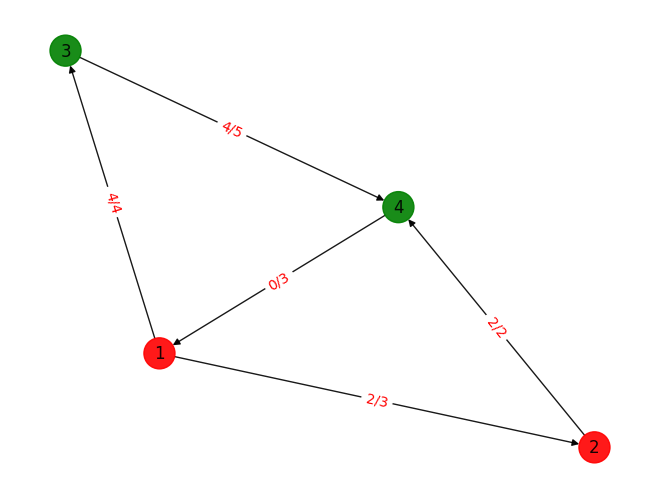

In [3]:
solver = MaximumFlow(4)
solver.add_edge(1, 2, 3)
solver.add_edge(2, 4, 2)
solver.add_edge(1, 3, 4)
solver.add_edge(3, 4, 5)
solver.add_edge(4, 1, 3)
print(solver.maximumflow(1,4))
solver.draw_graph(1, 4)

In [4]:
class MaximumMatching:
    def __init__(self, set1_num, set2_num):
        self.set1_num = set1_num
        self.set2_num = set2_num
        self.nodes_num = set1_num + set2_num
        self.flow_solver = MaximumFlow(self.nodes_num + 1)
        # We add edges from 0 to every node in set1 with capacity 1
        # and edges from j from set2 to node nodes_num + 1 with capacity 1;
        for i in range(1, set1_num + 1):
            self.flow_solver.add_edge(0, i, 1)
        for i in range(set1_num + 1, self.nodes_num + 1):
            self.flow_solver.add_edge(i, self.nodes_num + 1, 1)

        # Please ignore the following line. It's just used to draw the graph
        self.original_edges = [[0 for x in range(self.nodes_num + 1)] for y in range(self.nodes_num + 1)] 
        
    
    def add_edge(self, a, b):
        self.flow_solver.add_edge(a, self.set1_num + b, 1)

        # Please ignore the following line. It's just used to draw the graph
        self.original_edges[a][self.set1_num + b] = 1

    def max_maching(self):
        # We find the maximum matching by find the flow from node "0" to node "nodes_num + 1"
        return self.flow_solver.maximumflow(0, self.nodes_num + 1)
    



    #Please ignore the following codes. They are just used to draw the pictures#
    ############################################################################
    ############################################################################
    def draw_original_graph(self):
        G = nx.Graph()
        for i in range(1, self.set1_num):
            G.add_node(1)

        for j in range(self.set1_num + 1, self.nodes_num + 1):
            G.add_node(self.num2char(j - self.set1_num))

        for i in range(1, self.set1_num + 1):
            for j in range(self.set1_num + 1, self.nodes_num + 1):
                if self.original_edges[i][j] > 0:
                    G.add_edge(i, self.num2char(j - self.set1_num))

        set1 = range(1, self.set1_num + 1)

        nx.draw(G, pos=nx.bipartite_layout(G, set1), with_labels=True)

    def draw_result_graph(self):
        G = nx.Graph()
        for i in range(1, self.set1_num):
            G.add_node(1)

        for j in range(self.set1_num + 1, self.nodes_num + 1):
            G.add_node(self.num2char(j - self.set1_num))

        for i in range(1, self.set1_num + 1):
            for j in range(self.set1_num + 1, self.nodes_num + 1):
                if self.original_edges[i][j] > 0 and self.flow_solver.edges[i][j] == 0:
                    G.add_edge(i, self.num2char(j - self.set1_num))

        set1 = range(1, self.set1_num + 1)

        nx.draw(G, pos=nx.bipartite_layout(G, set1), with_labels=True)

    def num2char(self, i):
        return chr(i + 96)



2


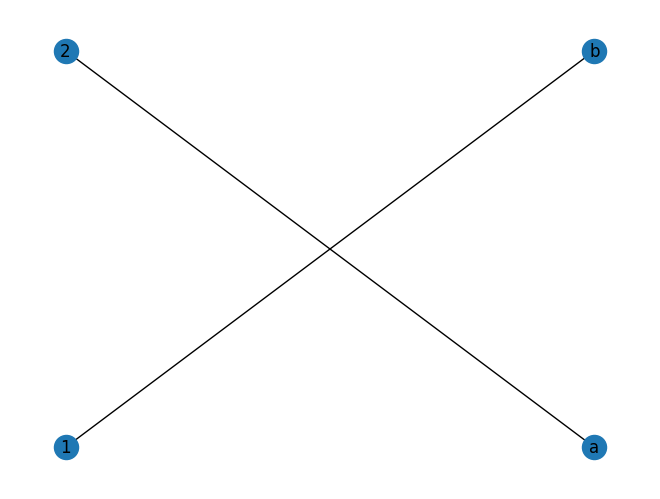

In [5]:
maxmatch = MaximumMatching(2, 2)
maxmatch.add_edge(1,1)
maxmatch.add_edge(1,2)
maxmatch.add_edge(2,1)
result = maxmatch.max_maching()
maxmatch.draw_result_graph()
print(result)
